<a href="https://colab.research.google.com/github/ronang4briel/curso-cdia/blob/main/ModeloLabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções Obrigatórias

1. Faça uma cópia deste Notebook (Arquivo/Salvar uma Cópia no Drive) antes de iniciar qualquer atividade.

<div>
  <img src="https://github.com/benilton/cursos/blob/main/imgs/colab-copy-template.png?raw=true" width="50%">
</div>

2. Em seguida, execute o código disponibilizado abaixo. Este passo deve durar cerca de 1 minuto. Basta clicar no "botão de play" e aguardar.

<div>
  <img src="https://github.com/benilton/cursos/blob/main/imgs/run-setup.png?raw=true" width="90%">
</div>

3. Ao fim do processo, uma série de resultados de configuração aparecerá e você poderá ignorá-las completamente.

<div>
  <img src="https://github.com/benilton/cursos/blob/main/imgs/setup-results.png?raw=true" width="90%">
</div>

In [ ]:
source("https://raw.githubusercontent.com/benilton/cursos/refs/heads/main/rcode/setup_r2u.R")

## Carregando Pacotes Necessários

In [ ]:
library(tidyverse)
library(readxl)
library(speff2trial)

Loading required package: leaps

Loading required package: survival



# Testes de Hipóteses

## Conjunto de dados: ACTG175

O ACTG 175 foi um ensaio clínico randomizado para comparar a monoterapia com zidovudina ou didanosina com a terapia combinada de zidovudina e didanosina ou zidovudina e zalcitabina em adultos infectados com o vírus da imunodeficiência humana tipo I, cujas contagens de células T CD4 estavam entre 200 e 500 por milímetro cúbico.

O estudo foi publicado no artigo:
Hammer SM, et al. (1996), "A trial comparing nucleoside monotherapy with combination therapy in HIV-infected adults with CD4 cell counts from 200 to 500 per cubic millimeter.", New England Journal of Medicine, 335:1081–1090.
https://pubmed.ncbi.nlm.nih.gov/8813038/

Este conjunto de dados contém 2139 observações com as seguintes 27 variáveis:

| Variável | Descrição |
|----------|-----------|
| `pidnum` | Número de identificação do paciente |
| `age` | Idade em anos no início do estudo |
| `wtkg` | Peso em kg no início do estudo |
| `hemo` | Hemofilia (0 = não, 1 = sim) |
| `homo` | Atividade homossexual (0 = não, 1 = sim) |
| `drugs` | Histórico de uso de drogas intravenosas (0 = não, 1 = sim) |
| `karnof` | Escore de Karnofsky (em uma escala de 0 a 100) |
| `oprior` | Terapia antirretroviral não zidovudina antes do início do tratamento do estudo (0 = não, 1 = sim) |
| `z30` | Uso de zidovudina nos 30 dias antes do início do tratamento (0 = não, 1 = sim) |
| `zprior` | Uso de zidovudina antes do início do tratamento (0 = não, 1 = sim) |
| `preanti` | Número de dias de terapia antirretroviral previamente recebida |
| `race` | Raça (0 = branco, 1 = não-branco) |
| `gender` | Gênero (0 = feminino, 1 = masculino) |
| `str2` | Histórico de antirretroviral (0 = ingênuo, 1 = experiente) |
| `strat` | Estratificação do histórico antirretroviral (1 = "antirretroviral ingênuo", 2 = "> 1 mas ≤ 52 semanas de terapia antirretroviral prévia", 3 = "> 52 semanas") |
| `symptom` | Indicador sintomático (0 = assintomático, 1 = sintomático) |
| `treat` | Indicador de tratamento (0 = apenas zidovudina, 1 = outras terapias) |
| `offtrt` | Indicador de interrupção do tratamento antes de 96 ±5 semanas (0 = não, 1 = sim) |
| `cd40` | Contagem de células T CD4 no início do estudo |
| `cd420` | Contagem de células T CD4 em 20 ±5 semanas |
| `cd496` | Contagem de células T CD4 em 96 ±5 semanas (NA se faltando) |
| `r` | Contagem de células T CD4 em 96 ±5 semanas ausente (0 = ausente, 1 = observado) |
| `cd80` | Contagem de células T CD8 no início do estudo |
| `cd820` | Contagem de células T CD8 em 20 ±5 semanas |
| `cens` | Indicador de observação do evento em dias |
| `days` | Número de dias até a primeira ocorrência de: (i) uma queda de pelo menos 50 na contagem de células T CD4, (ii) um evento indicando progressão para AIDS ou (iii) morte |
| `arms` | Grupo de tratamento (0 = zidovudina, 1 = zidovudina e didanosina, 2 = zidovudina e zalcitabina, 3 = didanosina) |

In [ ]:
data(ACTG175)
ACTG175 %>% head()

,pidnum,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,⋯,offtrt,cd40,cd420,cd496,r,cd80,cd820,cens,days,arms
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10056,48,89.8128,0,0,0,100,0,0,1,⋯,0,422,477,660,1,566,324,0,948,2
2,10059,61,49.4424,0,0,0,90,0,1,1,⋯,0,162,218,NA,0,392,564,1,1002,3
3,10089,45,88.4520,0,1,1,90,0,1,1,⋯,1,326,274,122,1,2063,1893,0,961,3
4,10093,47,85.2768,0,1,0,100,0,1,1,⋯,0,287,394,NA,0,1590,966,0,1166,3
5,10124,43,66.6792,0,1,0,100,0,1,1,⋯,0,504,353,660,1,870,782,0,1090,0
6,10140,46,88.9056,0,1,1,100,0,1,1,⋯,0,235,339,264,1,860,1060,0,1181,1


## Teste de Hipótese para 1 Média

**Objetivo**: Testar se a média da contagem de células T CD4 no início do estudo (variável cd40) é significativamente diferente de um valor de referência, como 350 células/mm³.

1. Calcule a média e o desvio padrão da contagem de células T CD4 no início do estudo.
2. Obtenha um intervalo de confiança de 95% para a contagem média de células T CB4.
3. Formule as hipóteses:
   - H0: A média da contagem de células T CD4 é 350.
   - H1: A média da contagem de células T CD4 é diferente de 350.
4. Realize o teste t para uma média.
5. Interprete o valor-p e conclua se há evidência para rejeitar a hipótese nula.

In [ ]:
ACTG175 %>% summarise(Media = mean(cd40),
                      SD = sd(cd40),
                      min = min(cd40),
                      max = max(cd40))

Media,SD,min,max
<dbl>,<dbl>,<int>,<int>
350.5012,118.5739,0,1199


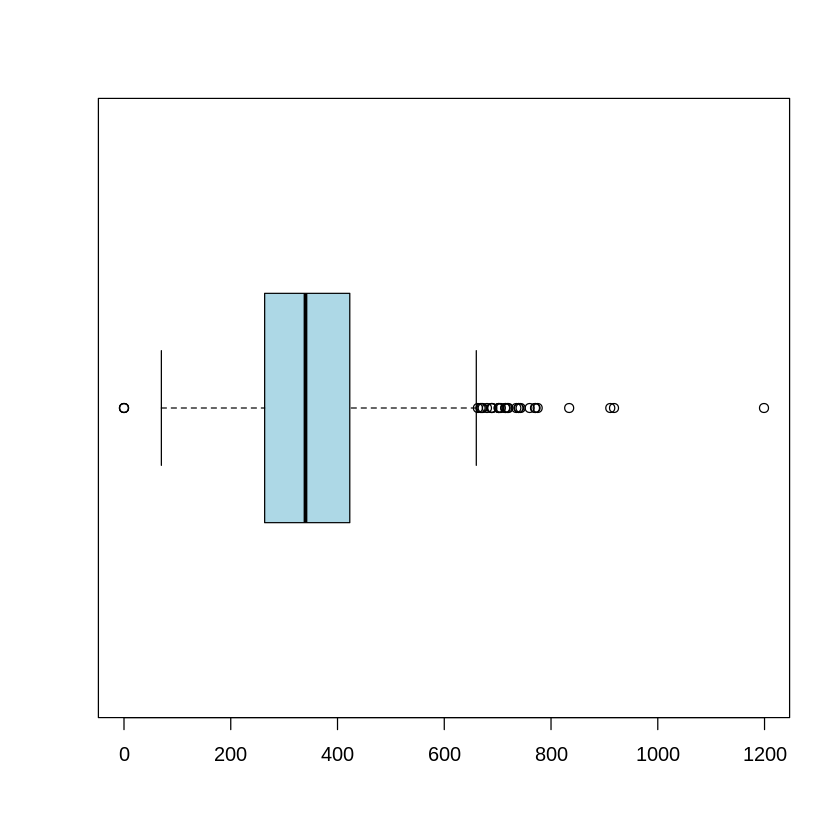

In [ ]:
boxplot(ACTG175$cd40, col = "lightblue", las= 1, horizontal = TRUE)

In [ ]:
confint(lm(ACTG175$cd40 ~1 ))

,2.5 %,97.5 %
(Intercept),345.4734,355.529


In [ ]:
t.test(ACTG175$cd40, mu = 350)


	One Sample t-test

data:  ACTG175$cd40
t = 0.19548, df = 2138, p-value = 0.845
alternative hypothesis: true mean is not equal to 350
95 percent confidence interval:
 345.4734 355.5290
sample estimates:
mean of x 
 350.5012 


## Teste de Hipóteses para 1 Proporção

**Objetivo**: Testar se a proporção de pacientes com histórico de uso de drogas intravenosas (variável `drugs`) é significativamente diferente de 0,25.

1. Calcule a proporção de pacientes com histórico de uso de drogas intravenosas.
2. Formule as hipóteses:
   - H0: A proporção de pacientes com histórico de uso de drogas intravenosas é 0,25.
   - H1: A proporção de pacientes com histórico de uso de drogas intravenosas é diferente de 0,25.
3. Use um teste de proporção
4. Interprete o resultado e avalie a evidência para rejeitar a hipótese nula.

In [ ]:
prop.test(sum(ACTG175$drugs == 1), length(ACTG175$drugs), p = 0.25)


	1-sample proportions test with continuity correction

data:  sum(ACTG175$drugs == 1) out of length(ACTG175$drugs), null probability 0.25
X-squared = 159.91, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.25
95 percent confidence interval:
 0.1174901 0.1465927
sample estimates:
        p 
0.1313698 


## Teste de Hipótese para 2 Médias

**Objetivo**: Comparar a média da contagem de células T CD4 entre pacientes sintomáticos e assintomáticos (variável `cd40` para a contagem inicial e `symptom` para o estado de sintomas).

1. Divida os dados em dois grupos: sintomáticos e assintomáticos.
2. Formule as hipóteses:
   - H0: As médias das contagens de células T CD4 são iguais para os grupos sintomático e assintomático.
   - H1: As médias das contagens de células T CD4 são diferentes entre os grupos.
3. Realize o teste t para duas amostras independentes.
4. Analise o valor-p e tire conclusões sobre a diferença entre as médias.

In [ ]:
t.test(cd40 ~ symptom, data = ACTG175)


	Welch Two Sample t-test

data:  cd40 by symptom
t = 6.5084, df = 572.51, p-value = 1.661e-10
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 28.66921 53.45177
sample estimates:
mean in group 0 mean in group 1 
       357.6037        316.5432 


## Teste de Hipótese para 2 Proporções

**Objetivo**: Comparar a proporção de pacientes com histórico de atividade homossexual entre os grupos de tratamento (variável `homo` para atividade homossexual e `treat` para tipo de tratamento).

1. Calcule as proporções de pacientes com atividade homossexual em cada grupo de tratamento.
2. Formule as hipóteses:
   - H0: As proporções de atividade homossexual são iguais entre os grupos de tratamento.
   - H1: As proporções de atividade homossexual são diferentes entre os grupos de tratamento.
3. Use o teste para duas proporções.
4. Avalie o valor-p e discuta as implicações do resultado para as proporções entre os grupos.

In [ ]:
prop.test(table(ACTG175$treat, ACTG175$homo))

# ANOVA

## Lendo o Arquivo de Dados

In [ ]:
input = read_excel("covid19.xlsx")

# Dimensão dos dados
input %>% dim()

# Primeiras linhas dos dados
input %>% head()

[1] 141   4

Label,Gene_Name,log2FC,Grupo
<chr>,<chr>,<dbl>,<chr>
Kent_10h-IC19_10h,IFNB1,-2.637805,Alpha/IC19
Kent_10h-IC19_10h,CD274,-2.327912,Alpha/IC19
Kent_10h-IC19_10h,CXCL10,-2.089109,Alpha/IC19
Kent_10h-IC19_10h,MX2,-1.812727,Alpha/IC19
Kent_10h-IC19_10h,USP18,-1.795118,Alpha/IC19
Kent_10h-IC19_10h,EPSTI1,-1.769586,Alpha/IC19


In [ ]:
table(input$Label)


 IC19_10h-VIC_10h Kent_10h-IC19_10h  Kent_10h-VIC_10h 
               47                47                47 

Transformar a coluna `Grupo` em fator. Isso facilitará a análise que realizaremos.

In [ ]:
input = input %>%
  mutate(Grupo = as.factor(Grupo))

input %>% head()

Label,Gene_Name,log2FC,Grupo
<chr>,<chr>,<dbl>,<fct>
Kent_10h-IC19_10h,IFNB1,-2.637805,Alpha/IC19
Kent_10h-IC19_10h,CD274,-2.327912,Alpha/IC19
Kent_10h-IC19_10h,CXCL10,-2.089109,Alpha/IC19
Kent_10h-IC19_10h,MX2,-1.812727,Alpha/IC19
Kent_10h-IC19_10h,USP18,-1.795118,Alpha/IC19
Kent_10h-IC19_10h,EPSTI1,-1.769586,Alpha/IC19


Vamos olhar as médias, desvios padrão e número de observações da variável de interesse (`log2FC`) em cada um dos grupos de interesse.

In [ ]:
input %>%
  group_by(Grupo) %>%
  summarise(medias = mean(log2FC),
            sd = sd(log2FC),
            n = n())

Grupo,medias,sd,n
<fct>,<dbl>,<dbl>,<int>
Alpha/IC19,-1.0088250,0.5705705,47
Alpha/VIC,-0.4853362,0.4057140,47
IC19/VIC,0.5211961,0.5186889,47


Observe que, aparentemente, existe diferenças nos níveis de expressão (`log2FC`) entre os diferentes diferentes grupos de indivíduos. Note também que esta é uma **impressão** que temos ao observar o gráfico abaixo. Precisamos, então, buscar mecanismos que quantifiquem apropriadamente as evidências dessas **possíveis diferenças** entre os grupos. Para isso, utilizaremos o método estatístico ANOVA.

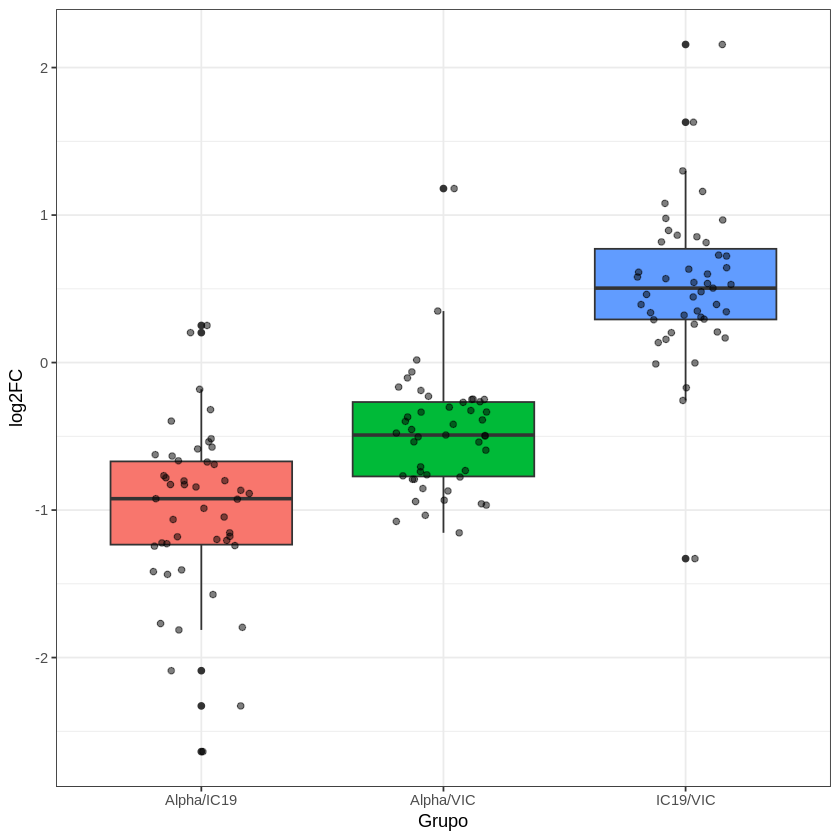

In [ ]:
input %>%
  ggplot(aes(x=Grupo, y=log2FC, fill=Grupo)) +
  geom_boxplot(show.legend = FALSE) +
  geom_jitter(width=0.2, alpha=0.5, show.legend = FALSE) +
  theme_bw()

## Determinando a Variabilidade Total

Vamos começar quantificando quanto vale a variabilidade total da variável de interesse `log2FC`. Esta variabilidade **não é** a mesma coisa que variância (para ser preciso matematicamente, a variabilidade apresentada abaixo é exatamente o numerador do que conhecemos como variância).

A definição de variabilidade utilizada aqui é a soma dos quadrados dos desvios de cada observação com respeito à média daquela variável.

Vejamos um passo-a-passo de como construir estes desvios:

In [ ]:
input %>%
  mutate(media = mean(log2FC),
         desvio = log2FC - media) %>%
  head()

Label,Gene_Name,log2FC,Grupo,media,desvio
<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>
Kent_10h-IC19_10h,IFNB1,-2.637805,Alpha/IC19,-0.3243217,-2.313484
Kent_10h-IC19_10h,CD274,-2.327912,Alpha/IC19,-0.3243217,-2.003590
Kent_10h-IC19_10h,CXCL10,-2.089109,Alpha/IC19,-0.3243217,-1.764787
Kent_10h-IC19_10h,MX2,-1.812727,Alpha/IC19,-0.3243217,-1.488405
Kent_10h-IC19_10h,USP18,-1.795118,Alpha/IC19,-0.3243217,-1.470796
Kent_10h-IC19_10h,EPSTI1,-1.769586,Alpha/IC19,-0.3243217,-1.445264


No código acima, criamos duas novas variáveis: `media` e `desvio`. A `media` nada mais é do que a média aritmética da variável `log2FC`. A variável `desvio` é simplesmente a diferença entre as colunas `log2FC` e `media`.

Agora, para determinar a variabilidade total, precisamos apenas somar os quadrados de cada um dos desvios que calculamos acima.

No código que segue, apenas para manter a clareza do que foi feito, repetiremos a criação das variáveis `media` e `desvio` e seguiremos com a determinação da variabilidade total.

In [ ]:
input %>%
  mutate(media = mean(log2FC),
         desvio = log2FC - media) %>%
  summarise(variabilidade_total = sum(desvio^2))

variabilidade_total
<dbl>
91.76329


## Ajustando a ANOVA

A ANOVA, representada no software R como a função `aov()`, particiona a variabilidade total dos dados (supondo que não existam grupos de indivíduos) em duas partes:

*   **Parte 1**: variabilidade devida à existência de grupos conhecidos (no nosso caso, os grupos descritos pela variável `Grupo`).
*   **Parte 2**: variabilidade devida a fatores desconhecidos (diferentes dos grupos descritos anteriormente) e que denotamos como `Erro/Resíduo`.

Abaixo, executamos uma ANOVA, solicitando que particione a variabilidade total da variável `log2FC` como função da variável `Grupo` e `Erro/Resíduo` (esta parte não precisa ser descrita na função, ela é feita automaticamente).



In [ ]:
fit = aov(log2FC ~ Grupo, data = input)
tabela_anova = fit %>%
                 broom::tidy()
tabela_anova

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Grupo,2,56.84042,28.4202116,112.3043,1.123111e-29
Residuals,138,34.92287,0.2530643,NA,NA


Observe como a soma da coluna `sumsq` coincide com a variabilidade total que calculamos anteriormente. Na verdade, isso não é uma coincidência, é uma identidade matemática.

In [ ]:
tabela_anova %>%
  summarise(variabilidade_total = sum(sumsq))

variabilidade_total
<dbl>
91.76329


O que entendemos do resultado da ANOVA é que nossos dados possuem uma variabilidade total de, aproximadamente, 91.76 unidades. Destas 91.76, observamos que 56.84 são devidas à existência dos três grupos definidos pela variável `Grupo` de nossa tabela de dados. As outras 34.92 unidades são devidas a outros fatores **desconhecidos**, que neste momento chamaremos de erros ou resíduos.

Agora, ao compararmos a variabilidade devida aos grupos (56.84) com a variabilidade residual (34.92), ficamos com a seguinte pergunta: **existem diferenças significativas entre os grupos apresentados?**

Para quantificar as evidências, podemos verificar o p-valor associado à ANOVA (repetiremos a tabela de ANOVA para sua conveniência):

In [ ]:
tabela_anova

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Grupo,2,56.84042,28.4202116,112.3043,1.123111e-29
Residuals,138,34.92287,0.2530643,NA,NA


O p-valor associado está representado em notação científica (1.123e-29) e pode ser um pouco difícil de ser compreendido. Precisamos lembrar que esta representação (para este valor específico) indica que temos 28 casas decimais iguais a zero antes do primeiro dígito 1 apresentado. Ou seja, o p-valor é:

\begin{equation}
p = 0.00000000000000000000000000001123
\end{equation}

Lembremos que a hipótese testada na ANOVA é **não existem diferenças entre os grupos apresentados** e comparemos também com a definição de p-valor para chegarmos à seguinte conclusão:

**Se assumirmos que não existem diferenças entre os grupos apresentados, temos uma probabilidade extremamente pequena (1.123e-29) de obtermos estatísticas pelo menos tão extremas quanto às da nossa ANOVA. Portanto, temos evidências para rejeitar a hipótese de inexistência de diferenças entre os grupos.**

## Onde estão as diferenças?

Com a ANOVA realizada acima, identificamos que existe pelo menos uma diferença entre os três grupos testados. Observe que a ANOVA **não indica** qual grupo é diferente de qual. Ou seja, sabemos que existe alguma diferença entre `Alpha/IC19`, `Alpha/VIC` e `IC19/VIC`. Mas não sabemos se as diferença residem entre (`Alpha/IC19` vs. `Alpha/VIC`) ou (`Alpha/IC19` vs. `IC19/VIC`) ou (`Alpha/VIC` vs. `IC19/VIC`).

Para buscar quais são as diferenças significativas nas comparações 2-a-2, precisamos realizar testes adicionais.

### Testes 2-a-2 com Correção de Bonferroni

Uma estratégia é utilizarmos testes-*t* para fazermos todas as comparações possíveis entre 2 grupos. Essencialmente, considerando que temos 3 grupos genéricos (A, B e C), esta estratégia realiza testes de hipótese para todas as combinações listadas abaixo:

*  A vs. B
*  A vs. C
*  B vs. C

Lembre-se que, em testes de hipótese, discutimos a existência de dois tipos de erro:

*  Erro Tipo I ($\alpha$): Rejeitar a hipótese nula, quando ela é verdadeira. No nosso exemplo, isso é equivalente a dizer que existe diferença entre dois grupos quando, na verdade, os dois grupos são iguais. Chamamos isso de **falso positivo**.
*  Erro Tipo II ($\beta$): Não rejeitar a hipótese nula, quando ela é falsa. No nosso exemplo, isso é equivalente a dizer que não há diferença entre dois grupos quando, na verdade, os dois grupos são diferentes. Chamamos isso de **falso negativo**.

Observe que, quando realizamos 3 testes de hipóteses conjuntamente, a probabilidade do Erro Tipo I é inflada. Isto é, a probabilidade de falso positivo (ao testar 3 hipóteses conjuntamente) é a soma das seguintes probabilidades:

1. Errar apenas o 1o. teste
2. Errar apenas o 2o. teste
3. Errar apenas o 3o. teste
4. Errar o 1o. e o 2o. testes
5. Errar o 1o. e o 3o. testes
6. Errar o 2o. e o 3o. testes
7. Errar o 1o., o 2o. e o 3o. testes

Calcular todas essas probabilidades separadamente não é trivial. Mas observe que o que estamos calculando é a probabilidade de, **pelo menos**, 1 Erro Tipo I. No nosso exemplo de 3 testes de hipótese, observando a listagem acima, vemos que:

* os casos 1-3 representam "errar exatamente 1 teste"
* os casos 4-6 representam "errar exatamente 2 testes"
* o caso 7 representa "errar exatamente 3 testes"

Se definirmos que $E$ representa o número de erros (Erros Tipo I) que podemos cometer ao testarmos 3 hipóteses simultaneamente, observe que temos a seguinte identidade:

\begin{eqnarray*}
P(E = 0) + P(E = 1) + P(E = 2) + P(E = 3) & = & 1 \\
P(E = 0) + P(E \geq 1) & = & 1 \\
P(E \geq 1) & = & 1 - P(E = 0).
\end{eqnarray*}

Dessa maneira, notemos que para termos zero Erros Tipo I, precisamos tomar a decisão correta nos 3 testes realizados. Sabendo que a probabilidade do Erro Tipo I para um teste de hipótese é $\alpha$, então a probabilidade de não cometer um Erro Tipo I é, consequentemente, $(1-\alpha)$. Desta maneira, temos:

\begin{eqnarray*}
P(E = 0) & = & (1 - \alpha) \times (1 - \alpha) \times (1 - \alpha) \\
& = & (1 - \alpha)^3 \\
P(E \geq 1) & = & 1 - P(E = 0) \\
& = & 1 - (1-\alpha)^3
\end{eqnarray*}

Neste longo exemplo, se assumirmos $\alpha = 0.05$, então a probabilidade de pelo menos 1 Erro Tipo I (ao testarmos 3 hipóteses simultaneamente) seria 0.1426. Ou seja, o erro máximo inicialmente aceito era de 5%, mas depois de testar 3 hipóteses simultaneamente, ele aumenta para a casa de 14%.

In [ ]:
pairwise.t.test(input$log2FC,
                input$Grupo,
                "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  input$log2FC and input$Grupo 

          Alpha/IC19 Alpha/VIC
Alpha/VIC 4.2e-06    -        
IC19/VIC  < 2e-16    < 2e-16  

P value adjustment method: bonferroni 

In [ ]:
pairwise.t.test(input$log2FC,
                input$Grupo,
                "bonferroni")

library(multcomp)
K = rbind('A-B' = c(1, -1,  0),
          'A-C' = c(1,  0, -1),
          'B-C' = c(0,  1, -1))
ht = glht(fit, linfct = mcp(Grupo = K))
bonf = summary(ht, test = adjusted("bonferroni"))
confint(bonf)